# Real Estate & Environment 

Proximity to parks is consdiered as a desirable feature by homeowners and real estate investors. In order to understand the impact of this preference on the real estate market, an analysis is conducted using the NYC property dataset. This dataset records the sale of every building or building unit (apartment, etc.) within the New York City property market over a 12-month period, spanning from 2003 to the present.
 The original source for the dataset is the New York City Department of Finance's comprehensive Rolling Sales data.


# Are property values higher in neighborhoods with proximity to parks?

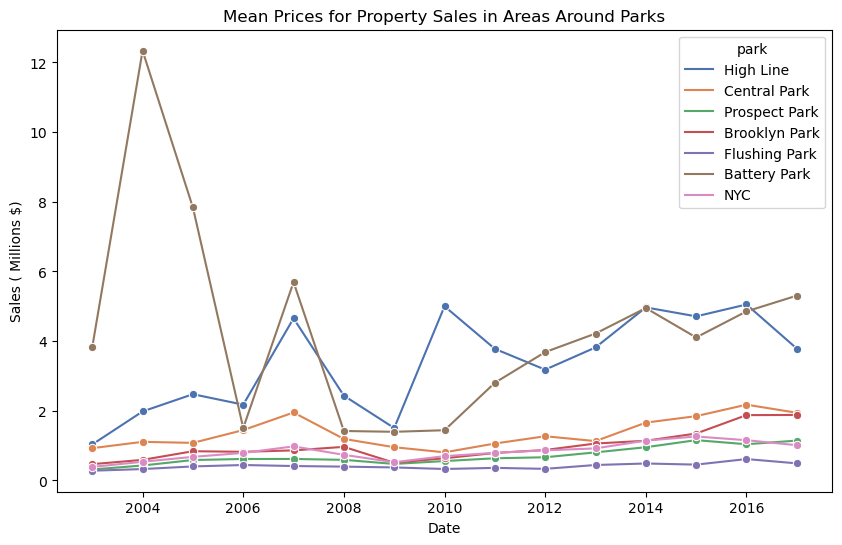

In [1]:
#| echo: true 
#| code-fold: true
# Suppress all warnings
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import pearsonr
import warnings
from folium import Map, Marker
from IPython.display import IFrame
import cenpy
import json
import folium
import numpy as np
import seaborn as sns 
import pandas as pd
import pygris
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('mode.chained_assignment', None)
#ref https://www.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf
sales = pd.read_csv("nyc-property-sales.csv" )
sales.drop_duplicates(inplace=True)
sales.dropna(inplace=True)

sales[' ZIP CODE'] = pd.to_numeric(sales[' ZIP CODE'], errors='coerce')
sales = sales.dropna(subset=[' ZIP CODE'])

sales['SALE DATE'] = pd.to_datetime(sales['SALE DATE'])
sales['year'] = sales['SALE DATE'].dt.year
sales.replace(' -  ', 0,  inplace=True)
sales.replace(np.nan,0, inplace=True)
sales['SALE PRICE'] = sales['SALE PRICE'].astype(float)
sales['SALE_PRICE_M'] = sales['SALE PRICE'].astype(np.float64) / 1000000

def calculate_mean_sales(df,zip_codes):
    df = df[df[' ZIP CODE'].isin(zip_codes)]
    mean_sales_by_year = df.groupby('year')['SALE_PRICE_M'].mean().reset_index()
    return mean_sales_by_year

high_line = [10001, 10011, 10018]
hl = calculate_mean_sales(sales,high_line)
hl['park'] = 'High Line'
#central sales 
Central =  [10019, 10023, 10024, 10025]
cn = calculate_mean_sales(sales,Central)
cn['park'] = 'Central Park'
#Prospect sales 
Prospect = [11215, 11217, 11218]
pr = calculate_mean_sales(sales,Prospect)
pr['park'] = 'Prospect Park'
#Brooklyn Bridge sales 
BrooklynBridge =  [11201, 11205, 11217]
Brooklyn = calculate_mean_sales(sales,BrooklynBridge)
Brooklyn['park'] = 'Brooklyn Park'
#Flushing sales 
Flushing_Park =[11368, 11369, 11373]
fp = calculate_mean_sales(sales,Flushing_Park)
fp['park'] = 'Flushing Park'
#Battery sales 
Battery= [10004, 10005, 10006]
bt = calculate_mean_sales(sales,Battery)
bt['park'] = 'Battery Park'
bt = calculate_mean_sales(sales,Battery)
bt['park'] = 'Battery Park'

overall = sales.groupby('year')['SALE_PRICE_M'].mean().reset_index()
overall['park'] = 'NYC'


mean_sales = pd.concat([hl, cn, pr ,Brooklyn , fp , bt , overall], ignore_index=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='SALE_PRICE_M', hue='park', data=mean_sales, marker='o' ,palette='deep' )
plt.xlabel('Date')
plt.ylabel('Sales ( Millions $)')
plt.title('Mean Prices for Property Sales in Areas Around Parks')
plt.show()

The sales prices in the High Line area and Battery Park area considered above the average sale prices across New York City, distinguishing them from other major parks.the High Line area experienced a surge in sale prices following the park's opening in 2009. As it was mentioned before, the High Line is a elevated linear park built on a historic freight rail line. the plot indicates there is a positive economic impact on areas with urban parks compared to other areas.

# What are the predominant land use around urban parks in NYC?

Understanding the types of buildings surrounding urban parks holds substantial importance for effective urban planning. For instance,Central Park , known as the top tourist attraction in NYC according to TripAdvisor. Recognizing the surrounding building landscape becomes pivotal as it transforms the park into a thriving hub, potentially elevating job opportunities and contributing to the city's income. <br>

Moreover, examining types of the surrounding buildings is essential for understanding the cooling effects that parks can have on different building types. This knowledge not only aids in optimizing the urban environment but also plays a significant role in policymaking. It provides valuable insights for policy making that enhance the overall quality of life in neighborhoods which results in maximizing the well-being of residents

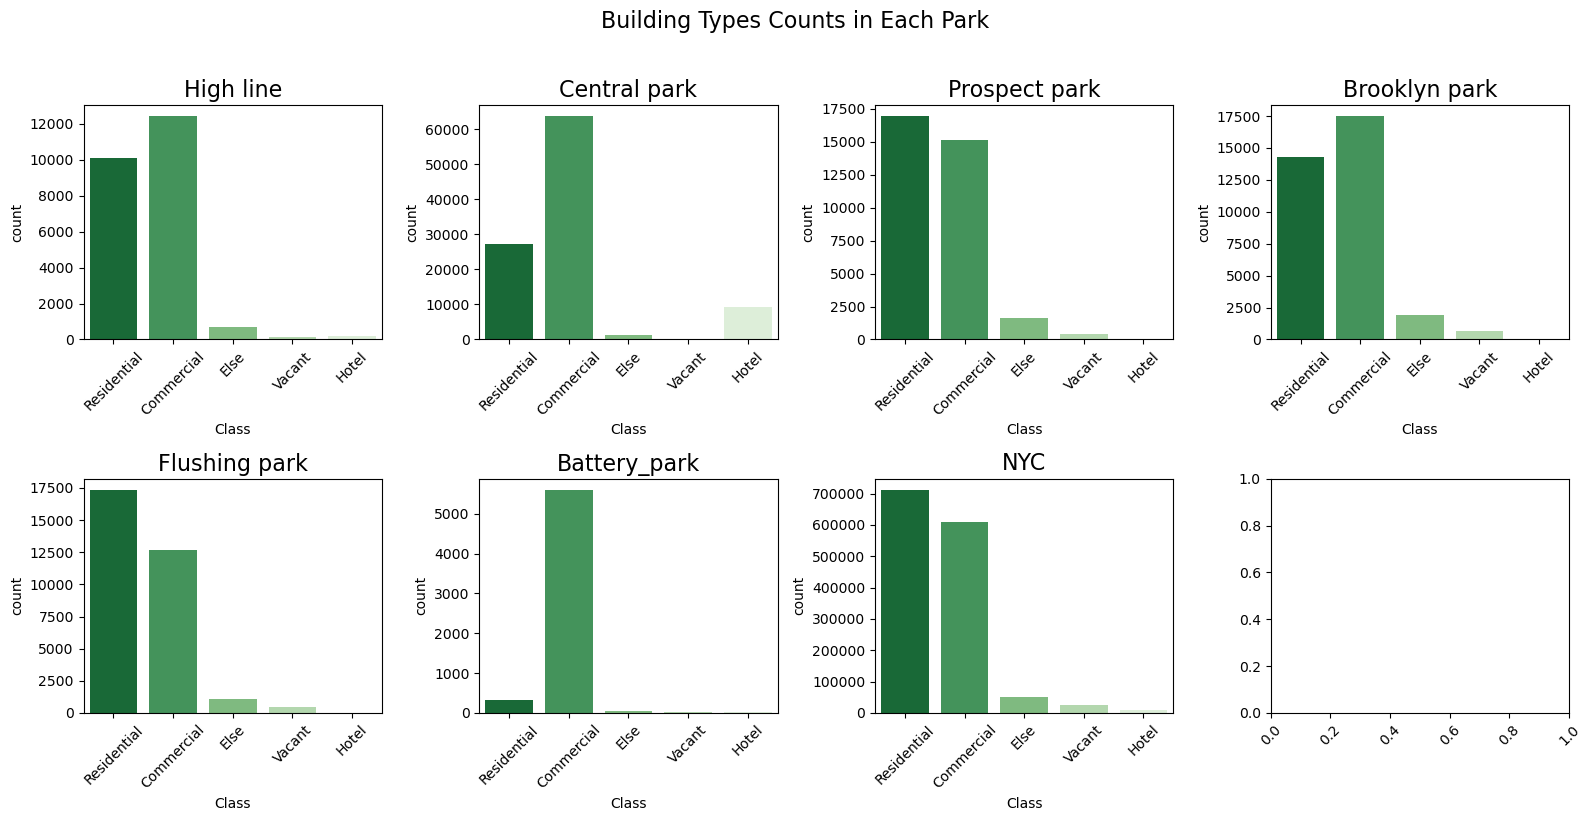

In [2]:
#| echo: true 
#| code-fold: true
sales['Class'] = np.where(sales['BUILDING CLASS AT PRESENT'].str.contains('^[ABCDSL]|^R[1-4]', case=False ,regex=True) , 'Residential' , 'Else')
sales['Class'] = np.where(sales['BUILDING CLASS AT PRESENT'].str.contains('^V', case=False ,regex=True) , 'Vacant' , sales['Class'])
sales['Class'] = np.where(sales['BUILDING CLASS AT PRESENT'].str.contains('^[KORB]', case=False ,regex=True) , 'Commercial' , sales['Class'])
sales['Class'] = np.where(sales['BUILDING CLASS AT PRESENT'].str.contains('^[H]', case=False ,regex=True) , 'Hotel' , sales['Class'])
parks_codes = [10001, 10011, 10018, 10019, 10023, 10024, 10025 , 11215, 11217, 11218 , 11201, 11205, 11217,
              11201, 11205, 11217, 11368, 11369, 11373 , 10004, 10005, 10006 ]

nyc_use = sales['Class'].value_counts().reset_index()
high_line = [10001, 10011, 10018]
hl_sales =  sales[sales[' ZIP CODE'].isin(high_line)]
hl_class = hl_sales['Class'].value_counts().reset_index()
#central sales 
Central =  [10019, 10023, 10024, 10025]
Central_sales =  sales[sales[' ZIP CODE'].isin(Central)]
Central_class = Central_sales['Class'].value_counts().reset_index()
#Prospect sales 
Prospect = [11215, 11217, 11218]
Prospect_sales =  sales[sales[' ZIP CODE'].isin(Prospect)]
Prospect_class = Prospect_sales['Class'].value_counts().reset_index()
#Brooklyn Bridge sales 
BrooklynBridge =  [11201, 11205, 11217]
Brooklyn_sales =  sales[sales[' ZIP CODE'].isin(BrooklynBridge)]
Brooklyn_class = Brooklyn_sales['Class'].value_counts().reset_index()
#Flushing sales 
Flushing_Park =[11368, 11369, 11373]
Flushing_sales =  sales[sales[' ZIP CODE'].isin(Flushing_Park)]
Flushing_class = Flushing_sales['Class'].value_counts().reset_index()
#Battery sales 
Battery= [10004, 10005, 10006]
Battery_sales =  sales[sales[' ZIP CODE'].isin(Battery)]
Battery_class = Battery_sales['Class'].value_counts().reset_index()


park_dfs = [hl_class, Central_class , Prospect_class , Brooklyn_class , Flushing_class , Battery_class , nyc_use]  # Add all park DataFrames to this list
parks_names = ['High line', 'Central park' ,'Prospect park' , 'Brooklyn park', 'Flushing park',  'Battery_park' , 'NYC']


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Building Types Counts in Each Park', y=1.02 ,fontsize=16)
order = ['Residential', 'Commercial', 'Else', 'Vacant', 'Hotel']
axes = axes.flatten()


for i, (park_name, park_df) in enumerate(zip(parks_names, park_dfs)):
    sns.barplot(x='Class', y='count', data=park_df, ax=axes[i] , palette='Greens_r' , order=order)
    axes[i].set_title(park_name, fontsize=16)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

The plots show a clear pattern in building types within downtown Manhattan, particularly in proximity to the High Line and Central Park. The predominant land use in these areas is commercial since these areas are considered prime locations for economic activities .Moreover, Around Central Park, there is a significant presence of hotels, aligning with the park's status as a major destination for tourists.
The presence of hotels proves Central Park's desirability, as having a room with a view of the park commands higher costs compared to rooms with alternative views. This aligns with the understanding that Central Park serves as an ideal location for hotels. Such pattern support that urban parks, like Central Park, have the potential to attract substantial tourism revenue<br>


Located in the heart of the financial district, Battery Park is a major location facing New York Harbor.It can be seen that the majority of the buildings surrounding it are for commercial use. This aligns logically with the financial district's status as a global commercial and financial hub. The presence of the park not only enhances the aesthetics of the area but also contributes to a more pleasant overall atmosphere.

It can be seen from the plots that both Flushing Meadows Corona Park and Prospect Park areas are predominantly surrounded by residential buildings rather than commercial ones. This could indicate a higher concentration of residential zones in these areas compared to commercial zones.
This pattern may prove that these areas are designed to be family-friendly, offering a quieter and less noisy environment than commercial districts, such as the financial district. Additionally, the parks’ locations in suburban settings align with the emphasis on residential development.


# How does the land use of an area (residential, commercial) affect the temperature reduction impact of nearby parks?


In [3]:
#| echo: true 
#| code-fold: true
import geopandas as gpd

# Specify the path to your GeoJSON file
geojson_file_path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'

# Read the GeoJSON file
gdf = gpd.read_file(geojson_file_path)


with open('indicators_data/2141.json', 'r') as file:
    temp_data = json.load(file)

temp_data = pd.DataFrame(temp_data)

#read shape file for UHF 42
shape_file_loc = 'UHF 42/UHF_42_DOHMH.shp'

#convert it into geopanda dataframe 
def get_gpd_df(use_shape_file=True):
    if use_shape_file:
        gdf = gpd.read_file(shape_file_loc)
    return gdf
uhf_gpd =  get_gpd_df()
uhf_gpd.to_crs(epsg = "4326", inplace = True)


temp_data = temp_data[temp_data.GeoType=="UHF42"]
temp_data.GeoID = temp_data.GeoID.astype(float)
merged_ny_temp_data = uhf_gpd.merge(
    temp_data,
    left_on=["UHF"],
    right_on=["GeoID"])

shape_file_loc =  'parks_map/geo_export_46a7de00-0067-42f5-a6bc-bec64e5a0f0b.shp'

#convert it into geopanda dataframe 
def get_gpd_df(use_shape_file=True):
    if use_shape_file:
        gdf = gpd.read_file(shape_file_loc)
    return gdf
parks_gpd =  get_gpd_df()

def style(feature):
    return {
        'fillColor': 'green',  
        'color': 'black',      
        'weight': 2,          
        'fillOpacity': 0.6    
    }
def mapping(df,col, parks_gpd=parks_gpd):

    m = df.explore(column=col,cmap = 'Reds', 
                                tiles="CartoDB positron", zoom_start=11)
    folium.Marker(location=[40.747993, -74.004890], popup="The High Line" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.Marker(location=[40.785091, -73.968285], popup="Central Park" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.Marker(location=[40.665535, -73.969749], popup="Prospect Park" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.Marker(location=[40.699215, -73.999039], popup="Brooklyn Bridge Park" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.Marker(location=[40.739716, -73.840782], popup="Flushing Meadows Corona Park" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.Marker(location=[40.703564, -74.016678], popup="Battery Park" , icon=folium.Icon(icon='tree' ,color='green')).add_to(m)
    folium.GeoJson(
    parks_gpd,
    name='geojson_layer',
    style_function=style
    ).add_to(m)
    return m 

m = mapping(merged_ny_temp_data,"Value")
# Save the map as HTML
html_path = "map6.html"
m.save(html_path)
# Display the HTML file as an iframe
IFrame(html_path, width=600, height=600)

<img src="https://landezine.com/wp-content/uploads/2017/04/06-Credit-Battery-Conservancy.jpg" alt="fd" width="500" height="500">

Overall, the areas with urban parks have cooler temperature compared to other areas.

The Battery Park area, located in the financial district, shows the lowest temperature among all major park areas. This phenomenon can likely be attributed to the combined effect of the park's cooling influence and the presence of commercial buildings in the area, as stated in the previous section. By looking at the financial district photo, it can be seen that the majority of buildings are skyscrapers. This architectural feature suggests that these tall buildings contribute significantly to shading the area, amplifying the cooling effect provided by the park's trees and resulting in lower temperatures in the surroundings.



Alternatively, the Flushing Meadows Corona Park area, which have a higher proportion of residential buildings compared to commercial buildings, exhibits a surface temperature surpassing other park areas.
This phenomenon indicates potential factors contributing to the elevated temperatures. Firstly, building materials commonly used in residential construction, such as asphalt and concrete, may absorb and retain heat more than other materials. Moreover, the population density in residential areas could play a role. The relative lack of shade, due to shorter stature of residential buildings compared to commercial ones, contributes to increased heat exposure in the surroundings. This could mean a potential need for increased vegetative cover in those areas to mitigate the elevated temperature.


# Is there a corrleation between vegetative cover and surface temperature

Pearson's correlation coefficient: -0.4628346272603856


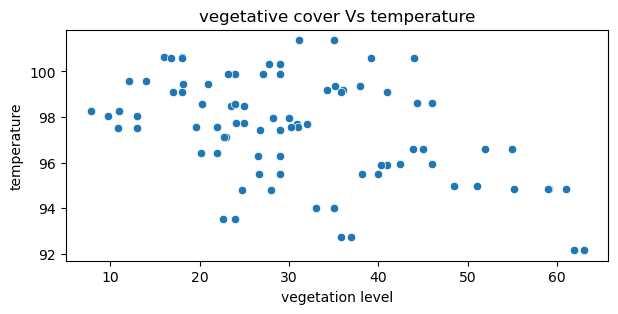

In [4]:
#| echo: true 
#| code-fold: true

#veg= 2143

import pandas as pd
import json
with open('indicators_data/2143.json', 'r') as file:
    v_data = json.load(file)

v_data = pd.DataFrame(v_data)
v_data = v_data[v_data['GeoType']=='UHF42']

merged_ny = temp_data.merge(
    v_data,
    left_on=["GeoID"],
    right_on=["GeoID"])

temp = temp_data[temp_data['GeoType']=='UHF42']

from scipy.stats import pearsonr
numerical_correlation, _ = pearsonr(merged_ny['Value_x'], merged_ny['Value_y'])
print(f"Pearson's correlation coefficient: {numerical_correlation}")

#| echo: true 
#| code-fold: true
%matplotlib inline
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Value_y', y='Value_x', data=merged_ny)
plt.title('vegetative cover Vs temperature')
plt.xlabel('vegetation level')
plt.ylabel('temperature')
plt.show()


A correlation of -0.46 indicates a moderate negative
 This mean that as vegetative cover increases, there is a tendency for temperatures to decrease. By Building more urban parks and planting more trees, this could mitigate the urban island heat effect in most areas of the city 


# Concluison

In conclusion, an analysis was conducted on the relationships between demographics, environmental factors, and real estate in the context of urban parks. This project could be used for further studies in different areas to enhance urban planning, policy making and overall urban community well being.